## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that utilizes an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

### Core Concepts:

- **Dimensionality Reduction**: PCA is predominantly used to reduce the dimensions of a data set by transforming to a new set of variables that retain most of the original data's variation.
- **Variance Capturing**: It identifies the directions in which the data varies the most, thereby preserving the essential parts that carry more information.
- **Orthogonal Transformation**: The principal components are orthogonal to each other, ensuring that the reduced dimensions are independent and non-redundant.

### Applications:

- **Feature Extraction and Data Visualization**: Simplifying data to two or three dimensions so that it can be visualized and analyzed more easily.
- **Noise Reduction**: By focusing on the principal components with higher variance, noise and less significant details can be filtered out.
- **Preprocessing for Other Algorithms**: Often used before applying other machine learning algorithms to enhance performance and reduce computational cost.

PCA is a powerful tool in exploratory data analysis and predictive modeling that helps to untangle complex datasets, revealing the most influential underlying structures.


# Principal Component Analysis (PCA) on Country Data

This notebook explores the application of PCA to the `Country-data.csv` dataset to identify patterns and visualize the data in a reduced dimensional space.


In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset
df = pd.read_csv('C:/Users/78641/Downloads/Country-data.csv')

# Displaying the first few rows of the dataframe
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Preprocessing

Prior to applying PCA, we need to standardize our data. This is crucial because PCA's output is influenced by the scale of the data.


In [3]:
# Separating out the features and dropping non-numeric columns 
features = df.drop(columns=['country'], errors='ignore')
features = features.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## PCA Transformation

We will apply PCA to transform the data, reduce dimensionality, and analyze the explained variance.


In [4]:
# Fitting PCA on the scaled data
pca = PCA()
pca.fit(features_scaled)

# Transforming data onto the principal components
features_pca = pca.transform(features_scaled)


## Explained Variance

To understand how much information is captured by each principal component, we analyze the explained variance ratio.


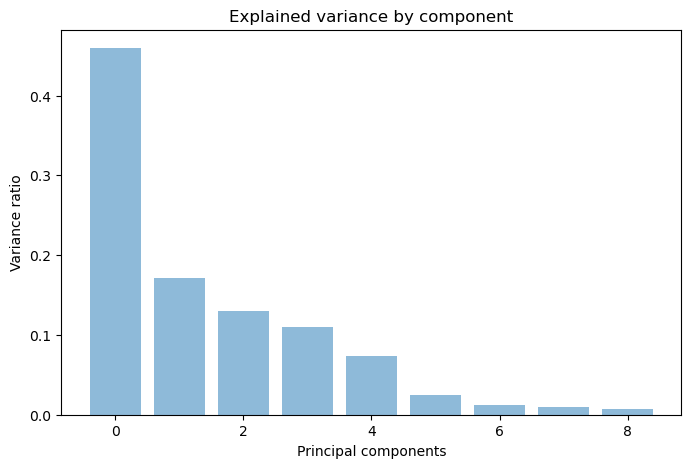

In [5]:
# Plotting the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance by component')
plt.show()


## PCA Explained Variance Analysis

The bar plot represents the explained variance ratio of principal components obtained from PCA.

### Observations:
- The first principal component accounts for over 40% of the variance in the dataset.
- There is a noticeable decrease in variance explained by each subsequent principal component.
- The first four principal components together explain more than 70% of the variance.

### Insights:
- The steep drop after the first component and the gradual flattening out suggest that the first few components capture the majority of useful information.
- Based on the elbow method applied to the explained variance, it might be reasonable to choose the first three or four principal components for further analysis, as they contain most of the significant variance.

This analysis helps in dimensionality reduction by identifying the number of principal components that should be retained to represent the dataset effectively without a substantial loss of information.


## Scatter Plot of Principal Components

We can now plot the first two principal components to visualize the data in a two-dimensional space.


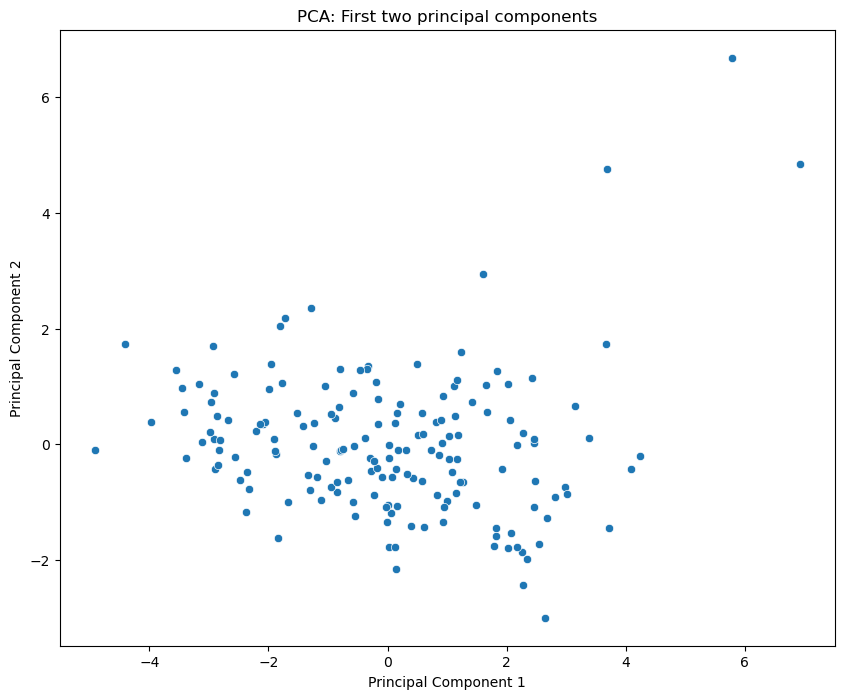

In [6]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1])
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## PCA Scatter Plot Analysis

The scatter plot above displays the distribution of data along the first two principal components derived from PCA.

### Observations:
- The data points are spread out primarily along the first principal component (x-axis), indicating that this component captures the most variance.
- The second principal component (y-axis) also shows variability in the data, but to a lesser extent.
- There is no clear separation of clusters within the data, suggesting that the two principal components do not distinctly partition the data into separate groups.

### Insights:
- The spread of points along the first principal component suggests it's a significant axis of variance and possibly contains important information about the dataset.
- The lack of distinct clustering may imply that the dataset does not have well-separated groups or that more than two components are required to reveal the underlying structure.
- If the goal is dimensionality reduction, these two components could be used for further analysis, but for clear clustering, additional techniques or more components might be needed.

This visualization serves as an exploratory analysis to understand the underlying structure of the dataset and to inform decisions on the number of components to retain for further modeling or visualization.
